Syriatel Telco company operating in Syria is trying to build a model to reduce their churn rate based on some US Telco data they have been given. Churn rate here has the usual meaning of people un-subscribing from a specific service over a certain amount of time. 

By looking at the dataset provided and its features, we can assume Syriatel is trying to improve only on their phone service sector while leaving the internet services separate for now.

This study will have two main goals: 

1) To create a model that minimises the instances in which customers leave (churn) Syriatel without Syriatel knowing they had been wanting to churn

2) Identify the features that determine a higher churn rate


A successful model would allow Syriatel to segment their customer audience and adopt different srategies in order to increase user retention.

We have used a Naive Bayes model as baseline and improved on our metrics by deploying other three models, namely Decision Tree Classifier, Random Forest and Logistic Regression.

The notebook will be divided  into the following sections:

- EDA

- Baseline Modelling

- 3 Classification Models Optimisations

- Performance Evaluation

- Findings and Feature Importance of the winning model.


In the EDA section we have also created some graphs which should be able to give some useful Telco insights on the US market. That intel can be reproduced in the Syrian Telco landscape.





# EDA 

### Initial EDA & Data Cleaning

In [1]:
# importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder

from sklearn.metrics import accuracy_score,roc_auc_score, f1_score, recall_score
from sklearn.metrics import  roc_curve, confusion_matrix, precision_score



from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression




In [4]:
# importing initial dataset
df = pd.read_csv('data/bigml_59c28831336c6604c800002a.csv')

# there are 3 types of data that are not numbers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [5]:
# displaying all columns
pd.set_option('display.max_columns', None)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
# converting all non-numerical values apart from 'state' into categorical
label_encoder = preprocessing.LabelEncoder()

df['international plan'] = label_encoder.fit_transform(df['international plan'])
df['voice mail plan'] = label_encoder.fit_transform(df['voice mail plan'])
df['area code'] = label_encoder.fit_transform(df['area code'])

df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,1,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,1,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,1,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,0,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,1,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,1,414-4276,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,1,370-3271,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,2,328-8230,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,2,364-6381,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [7]:
# each customer has got a single number
df['phone number'].nunique()

3333

In [8]:
# dropping phone number as it is irrelevant in our model since each customer has got a unique numbers
df.drop('phone number', axis = 1, inplace = True)

In [9]:
# there are no missing values
df.isna().sum()

state                     0
account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [10]:
# there doesn't seem to be any massive outliers by looking at min and max for each column
df.describe()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,1.000600,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,0.709649,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,1.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,2.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,2.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


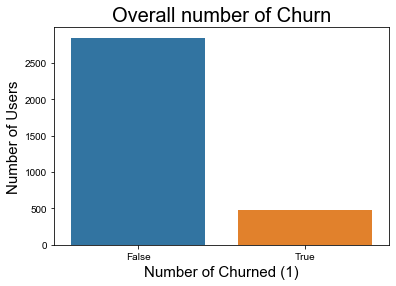

Overall Churn rate is  14.49 %


In [11]:
# calculating overall churn rate
churn = df['churn'].value_counts()
sns.barplot(churn.index, churn.values)
plt.title('Overall number of Churn', fontsize = 20)
plt.ylabel('Number of Users', fontsize = 15)
plt.xlabel('Number of Churned (1)', fontsize = 15)

plt.style.use('seaborn')
plt.show()

churn_rate = ((sum(df['churn'] == True)/ len(df['churn'])*100))
print('Overall Churn rate is ', round(churn_rate, 2), '%')

There is some clear **class imbalance** in our dataset that we will need to address when we apply our models

### Plotting all columns against churn rate

In [12]:
# converted the column names into a list
list_index = list(df.columns)

In [ ]:
# going through each of the features vs churn to look at both the single distributions and also relationship with churn
for i in list_index:
    df.groupby([i, "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(50,30))
    plt.title(f'churn rate with {i}' , fontsize = 70)
    plt.legend(fontsize = 30)
    plt.xticks(fontsize = 50)
    plt.yticks(fontsize = 50)
  
    plt.xlabel(i, fontsize = 50)
    plt.style.use('seaborn')
    
    
    

International calls and customer service calls are skewed to the left. Need to further investigate that.

###  What are the customer brackets (in terms of account length) with higher churn rate?

In [ ]:
df_brackets = df.copy()
df_brackets

In [ ]:
# bracketing account_lengths
bins = [0, 25, 50,75, 100, 125, 150, 175, 200, 225, 250]
labels = ['0-25','25-50','50-75','75-100','100-125','125-150', '150-175', '175-200', '200-225','225-250']
df_brackets['brackets_accounts_l'] = pd.cut(df_brackets['account length'], bins=bins, labels=labels)

df_brackets


In [ ]:
grouped_brack = df_brackets.groupby(['brackets_accounts_l', 'churn']).size().unstack().reset_index()

sum_all_t = grouped_brack[True].sum()
grouped_brack['churn_percentage'] = (grouped_brack[True] / sum_all_t) * 100
grouped_brack




In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
plt.bar(grouped_brack['brackets_accounts_l'], grouped_brack['churn_percentage'])
plt.title('Churn percentage in relation to accounts lifespan', fontsize = 30)

ax.set_xlabel("Account Activation in Days",fontsize=25)
ax.set_ylabel("Churn Percentage",fontsize=25)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.style.use('seaborn')


There seems to be a peak of account deactivations within the range 100-125 days. Customers after that time window seems to stick to the firm while customers prior to that haven't got enough info to drop out yet. 

###  What are the top 5 states for churn rate in the US market? Lowest 5?

In [ ]:
# plotting churn rate against states


state_grouped = df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))
plt.xlabel("States", fontsize = 30)
plt.xticks(fontsize = 25)
plt.yticks(fontsize = 25)
plt.ylabel("Number of Users", fontsize = 30)
plt.legend (loc = 2, fontsize = 40)
plt.title ('Churn rate per state', fontsize = 30)
plt.show()


In [ ]:
# extracting top5 and last 5 for churn rate percentage out of all the churned customers
state_grouped_1 = df.groupby(["state", "churn"]).size().unstack().reset_index()
sum_all_states = state_grouped_1[True].sum()
state_grouped_1['churn_percentage'] = (state_grouped_1[True] / sum_all_t) * 100
state_grouped_1.sort_values(by ='churn_percentage', ascending = False, inplace = True)
top_five_churn = state_grouped_1[:5]
lower_five_churn = state_grouped_1[-5:]
lower_five_churn

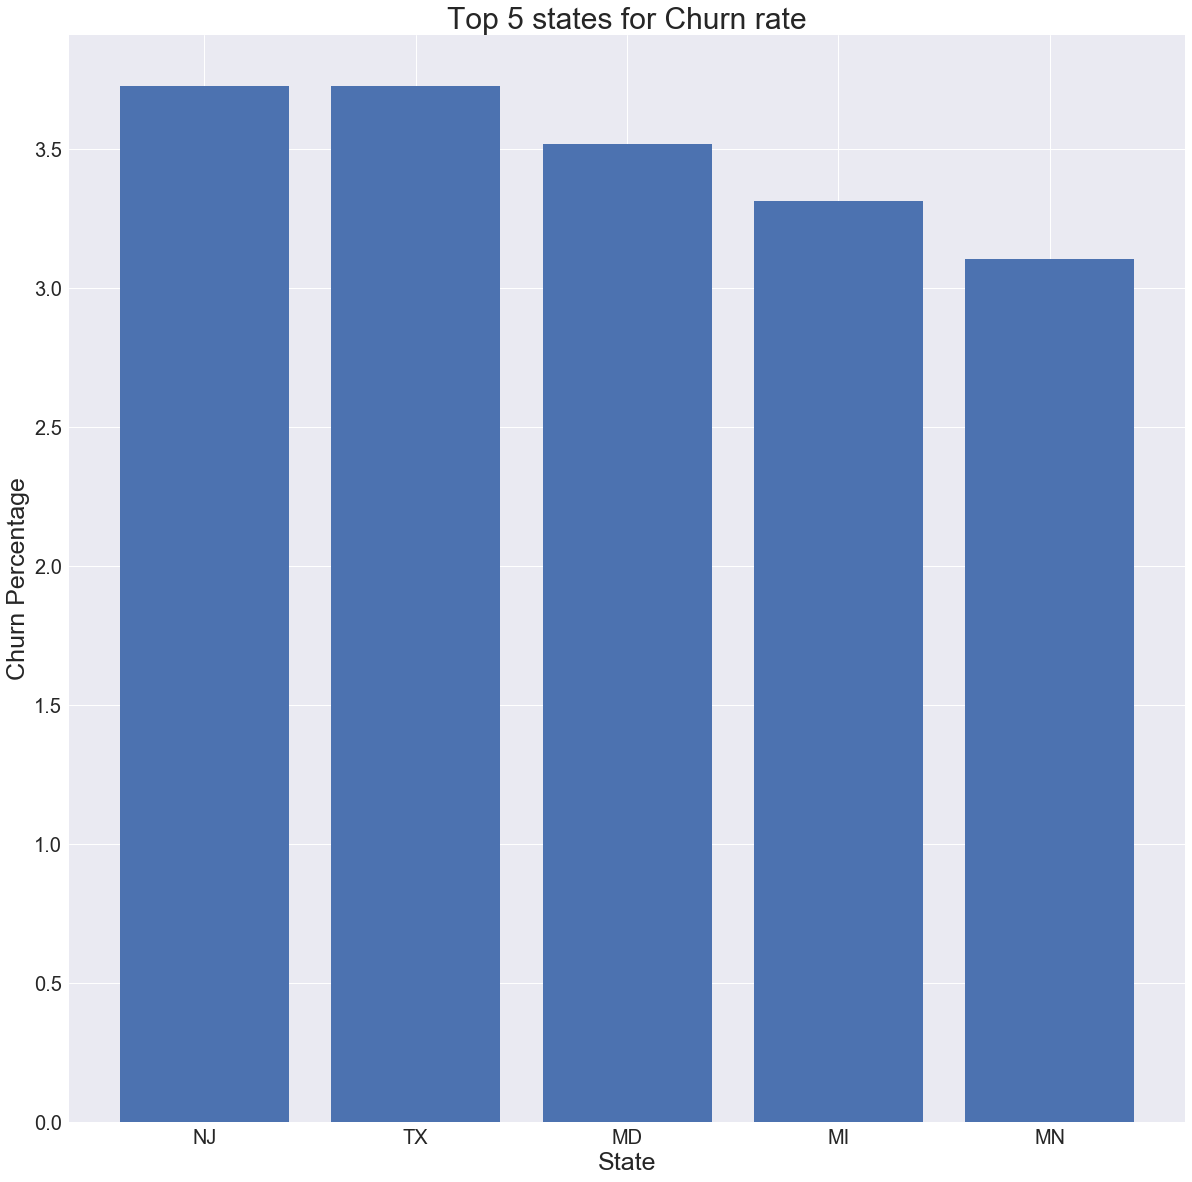

In [19]:
fig, ax = plt.subplots(figsize=(20,20))
plt.bar(top_five_churn['state'], top_five_churn['churn_percentage'])
plt.title('Top 5 states for Churn rate', fontsize = 30)

ax.set_xlabel("State",fontsize=25)
ax.set_ylabel("Churn Percentage",fontsize=25)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.style.use('seaborn')

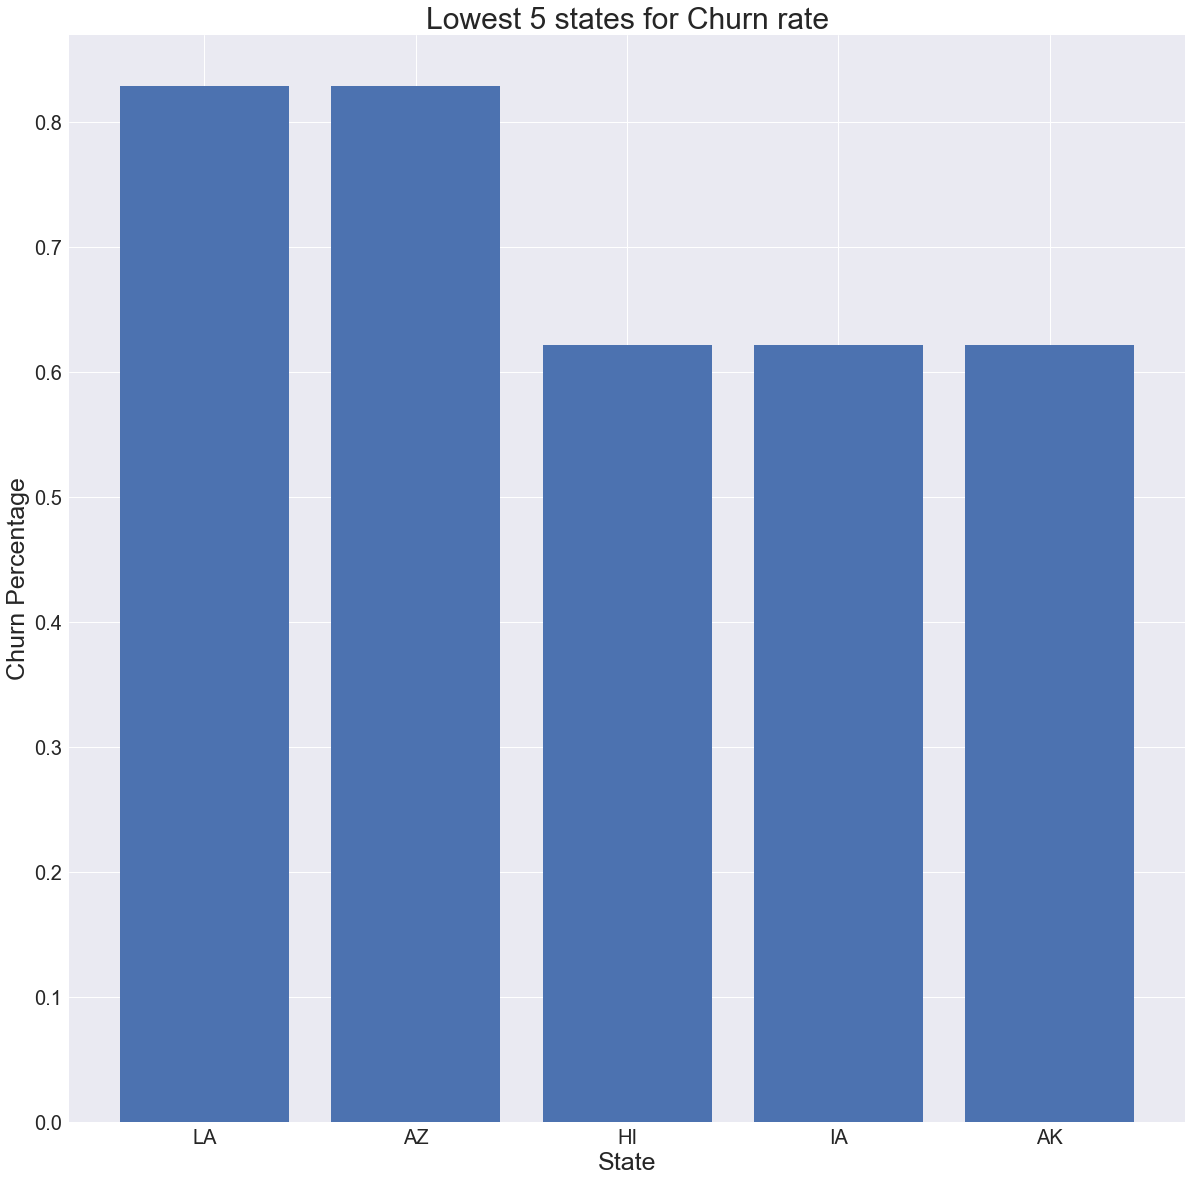

In [20]:
fig, ax = plt.subplots(figsize=(20,20))
plt.bar(lower_five_churn['state'], lower_five_churn['churn_percentage'])
plt.title('Lowest 5 states for Churn rate', fontsize = 30)

ax.set_xlabel("State",fontsize=25)
ax.set_ylabel("Churn Percentage",fontsize=25)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.style.use('seaborn')

Also since there is a significant difference across states in terms of churn rates, I am also encoding the states data to be used in our model.

In [21]:
df['state'] = label_encoder.fit_transform(df['state'])
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,1,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,49,68,1,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,39,28,2,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,6,184,2,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


### Correlation Matrix

In [22]:
df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
state,1.0,0.0037,0.015,-0.0046,-0.032,-0.028,-0.0067,-0.00076,-0.0067,0.014,-0.016,0.014,0.025,0.0075,0.025,-0.0078,0.014,-0.0078,-0.026,0.0078
account length,0.0037,1.0,-0.015,0.025,0.0029,-0.0046,0.0062,0.038,0.0062,-0.0068,0.019,-0.0067,-0.009,-0.013,-0.009,0.0095,0.021,0.0095,-0.0038,0.017
area code,0.015,-0.015,1.0,0.044,0.0099,0.0091,0.01,-0.0071,0.01,0.00028,-0.0021,0.0003,0.0071,0.028,0.0071,0.0015,-0.0081,0.0014,0.028,0.0033
international plan,-0.0046,0.025,0.044,1.0,0.006,0.0087,0.049,0.0038,0.049,0.019,0.0061,0.019,-0.029,0.012,-0.029,0.046,0.017,0.046,-0.025,0.26
voice mail plan,-0.032,0.0029,0.0099,0.006,1.0,0.96,-0.0017,-0.011,-0.0017,0.022,-0.0064,0.022,0.0061,0.016,0.0061,-0.0013,0.0076,-0.0013,-0.018,-0.1
number vmail messages,-0.028,-0.0046,0.0091,0.0087,0.96,1.0,0.00078,-0.0095,0.00078,0.018,-0.0059,0.018,0.0077,0.0071,0.0077,0.0029,0.014,0.0029,-0.013,-0.09
total day minutes,-0.0067,0.0062,0.01,0.049,-0.0017,0.00078,1.0,0.0068,1.0,0.007,0.016,0.007,0.0043,0.023,0.0043,-0.01,0.008,-0.01,-0.013,0.21
total day calls,-0.00076,0.038,-0.0071,0.0038,-0.011,-0.0095,0.0068,1.0,0.0068,-0.021,0.0065,-0.021,0.023,-0.02,0.023,0.022,0.0046,0.022,-0.019,0.018
total day charge,-0.0067,0.0062,0.01,0.049,-0.0017,0.00078,1.0,0.0068,1.0,0.007,0.016,0.007,0.0043,0.023,0.0043,-0.01,0.008,-0.01,-0.013,0.21
total eve minutes,0.014,-0.0068,0.00028,0.019,0.022,0.018,0.007,-0.021,0.007,1.0,-0.011,1.0,-0.013,0.0076,-0.013,-0.011,0.0025,-0.011,-0.013,0.093


There are no major correlation across any features apart from voicemail messages and active voicemail plan (it makes sense people with a voicemail plan wouls send more VM messages). Also, we have a perfect correlation between minutes and expenses charge, highlighting the fact that the company charges on a per minute basis across every time of the day day/evening/night.

Also, we are dropping area code and State for the modelling because we are doing this for a Syrian company with marketshare exclusive to Syria.

In [23]:
df.drop(['area code', 'state'], axis = 1 , inplace = True)

# Baseline Model Naive Bayes

In [24]:
# converting target variable into integers
df['churn'] = df['churn'].astype(int)
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [25]:
# setting up the y target and X dataset
y = df['churn']
X = df.drop('churn', axis = 1)


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
account length            3333 non-null int64
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
dtypes: float64(8), int64(9)
memory usage: 442.8 KB


In [27]:
# splitting initial training data and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 42)

print(f'My training set is {X_train.shape}')
print(f'My final test set is {X_test.shape}')
print(f'My training set dependant variable is {y_train.shape}')
print(f'My test set dependant variable is {y_test.shape}')

My training set is (2333, 17)
My final test set is (1000, 17)
My training set dependant variable is (2333,)
My test set dependant variable is (1000,)


In [28]:
# baseline model using bayes naive learner

# setting up the learner
gnb = GaussianNB()

# fitting the model and predict
model_naive = gnb.fit(X_train, y_train)

y_pred = model_naive.predict_proba(X_train)[:,1]
# y_pred_50 = model_naive.predict(X_train)
# len(y_pred)
# model_naive 

roc_auc_score (y_train, y_pred)

0.8433266432513798

Below Louis Addition that needs to be revised. How do you substitute Train and Test intto the below with training and validation from an SKF object?

In [ ]:

# base_pred_train = opt_model_base.predict_proba(X_train)[:,1]
# base_fpr_train, base_tpr_train, base_thresh_train = roc_curve(y_train, base_pred_train)

# base_pred_test = opt_model_base.predict_proba(X_test)[:,1]
# base_fpr_test, base_tpr_test, base_thresh_test = roc_curve(y_test, base_pred_test)

In [ ]:
# plt.style.use('ggplot')
# plt.figure(figsize=(12,7))
# ax1 = sns.lineplot(base_fpr_train, base_tpr_train, label='train',)
# ax1.lines[0].set_color("orange")
# ax1.lines[0].set_linewidth(2)

# ax2 = sns.lineplot(base_fpr_test, base_tpr_test, label='test')
# ax2.lines[1].set_color("yellow")
# ax2.lines[1].set_linewidth(2)

# ax3 = sns.lineplot([0,1], [0,1], label='baseline')
# ax3.lines[2].set_linestyle("--")
# ax3.lines[2].set_color("black")
# ax3.lines[2].set_linewidth(2)

# plt.title('Naive Bayes ROC Curve', fontsize=20)
# plt.xlabel('FPR', fontsize=16)
# plt.ylabel('TPR', fontsize=16)
# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.text(x=0.8, y=0.8, s="50-50 guess", fontsize=14,
#          bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=0.4"))

# plt.legend(loc=4, fontsize=17)
# plt.show();

## Baseline Performance Evaluation Naive Bayes

In [29]:
skf = StratifiedKFold(n_splits = 10, random_state = 600)

param_grid = {'var_smoothing': [1e-09]}

opt_model_base = GridSearchCV(model_naive,
                         param_grid,
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)

opt_model_base.fit(X_train,y_train)

# opt_model_base.cv_results_


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=600, shuffle=False),
             error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None, param_grid={'var_smoothing': [1e-09]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=0)

In [30]:
print('The validation baseline roc_auc score is mean 0.8374 std 0.04')
print('The training baseline roc_auc_score is mean 0.8448 std 0.004 ')

The validation baseline roc_auc score is mean 0.8374 std 0.04
The training baseline roc_auc_score is mean 0.8448 std 0.004 


In [31]:
pd.DataFrame(opt_model_base.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.005135,0.001721,0.003691,0.001145,1e-09,{'var_smoothing': 1e-09},0.8725,0.823235,0.900441,0.855454,0.856341,0.839048,0.706621,0.848507,0.82279,0.842743,0.836805,0.04853,1,0.840427,0.847284,0.838061,0.843578,0.83976,0.844913,0.855734,0.841542,0.84472,0.841476,0.843749,0.004773


In [32]:
print(skf)

StratifiedKFold(n_splits=10, random_state=600, shuffle=False)


# Hyperparameter Tuning on 3 Classification Models

## Decision Tree and Hyperparameter Tuning

In [31]:
from sklearn.tree import DecisionTreeClassifier
# setting up the learner
model_tree = DecisionTreeClassifier(max_depth=2,min_samples_leaf=10,random_state=40, class_weight = 'balanced' )
# fitting the model
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=40, splitter='best')

In [32]:
skf = StratifiedKFold(n_splits=10, random_state=600, shuffle=True)
param_grid = {'max_depth': [2], 'min_samples_leaf': [10] }

basic_model_tree = GridSearchCV(DecisionTreeClassifier(random_state=40, class_weight = 'balanced'),
                         param_grid,       
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)

basic_model_tree.fit(X_train,y_train)

basic_model_tree.cv_results_



{'mean_fit_time': array([0.00992296]),
 'std_fit_time': array([0.00228983]),
 'mean_score_time': array([0.00311496]),
 'std_score_time': array([0.00128386]),
 'param_max_depth': masked_array(data=[2],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2, 'min_samples_leaf': 10}],
 'split0_test_score': array([0.71661765]),
 'split1_test_score': array([0.64242647]),
 'split2_test_score': array([0.70080882]),
 'split3_test_score': array([0.7228052]),
 'split4_test_score': array([0.73196867]),
 'split5_test_score': array([0.75221697]),
 'split6_test_score': array([0.81510494]),
 'split7_test_score': array([0.7298995]),
 'split8_test_score': array([0.80823234]),
 'split9_test_score': array([0.7298256]),
 'mean_test_score': array([0.73492841]),
 'std_test_score': array([0.04730548]),
 'rank_test_score': array

In [33]:
print('The validation unoptimised Decision Tree roc_auc score is mean 0.7349 std 0.04')
print('The training unoptimised Decision Tree roc_auc_score is mean 0.7588 std 0.007 ')

The validation unoptimised Decision Tree roc_auc score is mean 0.7349 std 0.04
The training unoptimised Decision Tree roc_auc_score is mean 0.7588 std 0.007 


In [34]:
# applying hyperparameter optimisation
skf = StratifiedKFold(n_splits=10, random_state=600, shuffle=True)

param_grid = {'max_depth': range(1,15), 'min_samples_leaf': [5,10,15,20,25,30,35,40,45] }

# change all the parameters in the GridSearch CV!
opt_model_tree = GridSearchCV(DecisionTreeClassifier(random_state=40, class_weight = 'balanced'),
                         param_grid,
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)

opt_model_tree.fit(X_train,y_train)

pd.DataFrame(opt_model_tree.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.010103,0.004196,0.005897,0.005612,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.612059,0.592353,0.638971,0.638782,0.592521,0.660656,0.613287,0.601833,0.582841,0.616539,0.614983,0.023371,118,0.636632,0.638824,0.633643,0.633665,0.638807,0.631233,0.653633,0.637769,0.621216,0.636135,0.636156,0.007631
1,0.008727,0.002854,0.003287,0.000789,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.612059,0.592353,0.638971,0.638782,0.592521,0.660656,0.613287,0.601833,0.582841,0.616539,0.614983,0.023371,118,0.636632,0.638824,0.633643,0.633665,0.638807,0.631233,0.653633,0.637769,0.621216,0.636135,0.636156,0.007631
2,0.007578,0.001203,0.003454,0.000522,1,15,"{'max_depth': 1, 'min_samples_leaf': 15}",0.612059,0.592353,0.638971,0.638782,0.592521,0.660656,0.613287,0.601833,0.582841,0.616539,0.614983,0.023371,118,0.636632,0.638824,0.633643,0.633665,0.638807,0.631233,0.653633,0.637769,0.621216,0.636135,0.636156,0.007631
3,0.007076,0.001364,0.003152,0.000802,1,20,"{'max_depth': 1, 'min_samples_leaf': 20}",0.612059,0.592353,0.638971,0.638782,0.592521,0.660656,0.613287,0.601833,0.582841,0.616539,0.614983,0.023371,118,0.636632,0.638824,0.633643,0.633665,0.638807,0.631233,0.653633,0.637769,0.621216,0.636135,0.636156,0.007631
4,0.006843,0.001543,0.003181,0.001104,1,25,"{'max_depth': 1, 'min_samples_leaf': 25}",0.612059,0.592353,0.638971,0.638782,0.592521,0.660656,0.613287,0.601833,0.582841,0.616539,0.614983,0.023371,118,0.636632,0.638824,0.633643,0.633665,0.638807,0.631233,0.653633,0.637769,0.621216,0.636135,0.636156,0.007631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,0.017729,0.000593,0.002457,0.000228,14,25,"{'max_depth': 14, 'min_samples_leaf': 25}",0.832132,0.826838,0.822868,0.836018,0.907996,0.886787,0.925067,0.900458,0.927062,0.871046,0.873568,0.039360,33,0.963874,0.965615,0.963301,0.968562,0.963048,0.962935,0.958630,0.956402,0.954219,0.964514,0.962110,0.004156
122,0.016932,0.000849,0.002687,0.000505,14,30,"{'max_depth': 14, 'min_samples_leaf': 30}",0.833382,0.822574,0.829485,0.842965,0.936447,0.884053,0.920115,0.903192,0.902158,0.882205,0.875597,0.038808,19,0.955307,0.954996,0.950628,0.957458,0.956375,0.954842,0.946010,0.952704,0.946737,0.953232,0.952829,0.003708
123,0.017165,0.000784,0.003156,0.002063,14,35,"{'max_depth': 14, 'min_samples_leaf': 35}",0.837206,0.832059,0.835368,0.889373,0.924549,0.868756,0.925140,0.901345,0.901714,0.869495,0.878444,0.033739,10,0.949970,0.951202,0.946970,0.949556,0.941766,0.948323,0.936017,0.947614,0.942030,0.951828,0.946527,0.004785
124,0.038391,0.022859,0.005997,0.004333,14,40,"{'max_depth': 14, 'min_samples_leaf': 40}",0.828750,0.820221,0.826176,0.863952,0.928835,0.876293,0.921667,0.896615,0.913982,0.861440,0.873730,0.038589,31,0.947103,0.945645,0.944611,0.947243,0.937986,0.945275,0.935226,0.943255,0.933942,0.948196,0.942848,0.004940


In [35]:
# best hyperparameters and roc_auc score
print('Values of the optimised hyperparameters for the best model found:\n', opt_model_tree.best_params_)
opt_model_tree.best_score_

Values of the optimised hyperparameters for the best model found:
 {'max_depth': 5, 'min_samples_leaf': 35}


0.8846788425752474

## Random Forest Classifier and Hyperparameters Tuning

In [36]:
# setting up the learner and fitting
model_random_forest = RandomForestClassifier(n_estimators=100, 
                                             random_state = 11, 
                                             class_weight= 'balanced',
                                             max_depth = 15,
                                             min_samples_leaf= 20 
                                             )
model_random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=20,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=11, verbose=0, warm_start=False)

In [37]:
# # estimating initial performance
# y_hat_random = model_random_forest.predict_proba(X_train)[:,1]
# print('Roc_score is ',roc_auc_score(y_train, y_hat_random))

# # the validation here for Random!

skf = StratifiedKFold(n_splits=10, random_state=600, shuffle=True)

param_grid = {'max_depth': [15], 'min_samples_leaf': [20] }

basic_model_random = GridSearchCV(RandomForestClassifier(random_state=11, class_weight='balanced', n_estimators=100),
                         param_grid,       
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)

basic_model_random.fit(X_train,y_train)

basic_model_random.cv_results_

{'mean_fit_time': array([0.51051588]),
 'std_fit_time': array([0.14357812]),
 'mean_score_time': array([0.02004759]),
 'std_score_time': array([0.0179535]),
 'param_max_depth': masked_array(data=[15],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[20],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 15, 'min_samples_leaf': 20}],
 'split0_test_score': array([0.86455882]),
 'split1_test_score': array([0.85029412]),
 'split2_test_score': array([0.84102941]),
 'split3_test_score': array([0.8916642]),
 'split4_test_score': array([0.9323086]),
 'split5_test_score': array([0.88102276]),
 'split6_test_score': array([0.94960095]),
 'split7_test_score': array([0.87496305]),
 'split8_test_score': array([0.92373633]),
 'split9_test_score': array([0.90008868]),
 'mean_test_score': array([0.89087659]),
 'std_test_score': array([0.03392777]),
 'rank_test_score': arr

Clear signs of overfitting on the training datasets! It's easy for Random Forest to Overfit

In [38]:
print('The validation unoptimised Random Forest Tree roc_auc score is mean 0.8908 std 0.03')
print('The training unoptimised Random Forest Tree roc_auc_score is mean 0.9685 std 0.001 ')

The validation unoptimised Random Forest Tree roc_auc score is mean 0.8908 std 0.03
The training unoptimised Random Forest Tree roc_auc_score is mean 0.9685 std 0.001 


In [39]:
# applying hyperparameter optimisations
skf = StratifiedKFold(n_splits=10, random_state=600, shuffle=True)

param_grid = {'max_depth': range(1,15), 'min_samples_leaf': [5,10,15,20,25]}

# change all the parameters in the GridSearch CV!
opt_model_forest = GridSearchCV(RandomForestClassifier(random_state=11, class_weight='balanced',n_estimators=100),
                         param_grid,
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)

opt_model_forest.fit(X_train,y_train)

pd.DataFrame(opt_model_forest.cv_results_)



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.252907,0.057729,0.013349,0.001380,1,5,"{'max_depth': 1, 'min_samples_leaf': 5}",0.784853,0.820588,0.818529,0.835279,0.830624,0.862918,0.866095,0.810597,0.897354,0.845773,0.837223,0.030513,66,0.856450,0.851073,0.863309,0.860428,0.839610,0.851871,0.849354,0.857247,0.859690,0.842697,0.853173,0.007346
1,0.251485,0.018089,0.015476,0.007194,1,10,"{'max_depth': 1, 'min_samples_leaf': 10}",0.784853,0.820588,0.818529,0.835279,0.830624,0.862918,0.866095,0.810597,0.897354,0.845773,0.837223,0.030513,66,0.856450,0.851073,0.863309,0.860428,0.839610,0.851871,0.849354,0.857247,0.859690,0.842697,0.853173,0.007346
2,0.748516,0.235379,0.042312,0.022663,1,15,"{'max_depth': 1, 'min_samples_leaf': 15}",0.784853,0.820588,0.818529,0.835279,0.830624,0.862918,0.866095,0.810597,0.897354,0.845773,0.837223,0.030513,66,0.856450,0.851073,0.863309,0.860428,0.839610,0.851871,0.849354,0.857247,0.859690,0.842697,0.853173,0.007346
3,0.238678,0.047343,0.014611,0.007603,1,20,"{'max_depth': 1, 'min_samples_leaf': 20}",0.784853,0.820588,0.818529,0.835279,0.830624,0.862918,0.866095,0.810597,0.897354,0.845773,0.837223,0.030513,66,0.856450,0.851073,0.863309,0.860428,0.839610,0.851871,0.849354,0.857247,0.859690,0.842697,0.853173,0.007346
4,0.193892,0.008927,0.010999,0.000521,1,25,"{'max_depth': 1, 'min_samples_leaf': 25}",0.784853,0.820588,0.818529,0.835279,0.830624,0.862918,0.866095,0.810597,0.897354,0.845773,0.837223,0.030513,66,0.856450,0.851073,0.863309,0.860428,0.839610,0.851871,0.849354,0.857247,0.859690,0.842697,0.853173,0.007346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.431523,0.021867,0.012817,0.000821,14,5,"{'max_depth': 14, 'min_samples_leaf': 5}",0.860441,0.874265,0.866176,0.910730,0.943246,0.908809,0.961720,0.885457,0.914573,0.913095,0.903804,0.031138,5,0.997505,0.997357,0.997328,0.997874,0.997340,0.997330,0.997559,0.997189,0.997570,0.997517,0.997457,0.000182
66,0.402035,0.012533,0.012474,0.000924,14,10,"{'max_depth': 14, 'min_samples_leaf': 10}",0.866029,0.866765,0.869706,0.896098,0.948123,0.896542,0.953887,0.884718,0.925510,0.904966,0.901191,0.030528,13,0.990180,0.990149,0.989440,0.990684,0.988742,0.989710,0.989212,0.989014,0.989393,0.990074,0.989660,0.000575
67,0.396502,0.009577,0.012425,0.000427,14,15,"{'max_depth': 14, 'min_samples_leaf': 15}",0.861618,0.861029,0.853971,0.896542,0.938960,0.896394,0.956695,0.873928,0.921076,0.903636,0.896337,0.032983,23,0.978817,0.978969,0.979049,0.978434,0.976197,0.978560,0.977230,0.977288,0.977877,0.979751,0.978217,0.001008
68,0.387370,0.009159,0.012426,0.000524,14,20,"{'max_depth': 14, 'min_samples_leaf': 20}",0.864559,0.850000,0.842941,0.890334,0.930683,0.881171,0.949897,0.875998,0.923441,0.899793,0.890832,0.033452,44,0.970530,0.968687,0.968643,0.970457,0.965797,0.967703,0.966541,0.967991,0.967590,0.970178,0.968412,0.001537


In [40]:
print('Values of the optimised hyperparameters\nfor the best model found:\n',opt_model_forest.best_params_)
opt_model_forest.best_score_

Values of the optimised hyperparameters
for the best model found:
 {'max_depth': 11, 'min_samples_leaf': 5}


0.9061348667393343

##  Logistic Regression

In [41]:
# setting up the learner and fitting it
log_model = LogisticRegression(class_weight = 'balanced', penalty = 'l2', random_state = 15, solver = 'liblinear')
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=15, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
# # evaluating performance on roc_curve
# y_hat_log = log_model.predict_proba(X_train)[:,1]
# print('Roc_score is ',roc_auc_score(y_train, y_hat_log))

skf = StratifiedKFold(n_splits=10, random_state=600, shuffle=True)
param_grid = {'penalty': ['l2']}

basic_model_logistic = GridSearchCV(LogisticRegression(class_weight = 'balanced', random_state = 15, solver = 'liblinear'),
                         param_grid,       
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)

basic_model_logistic.fit(X_train,y_train)

basic_model_logistic.cv_results_

{'mean_fit_time': array([0.04513443]),
 'std_fit_time': array([0.00743131]),
 'mean_score_time': array([0.00255132]),
 'std_score_time': array([0.00037069]),
 'param_penalty': masked_array(data=['l2'],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'penalty': 'l2'}],
 'split0_test_score': array([0.75573529]),
 'split1_test_score': array([0.78102941]),
 'split2_test_score': array([0.79911765]),
 'split3_test_score': array([0.8649128]),
 'split4_test_score': array([0.80313331]),
 'split5_test_score': array([0.83343187]),
 'split6_test_score': array([0.81998226]),
 'split7_test_score': array([0.79101389]),
 'split8_test_score': array([0.82796335]),
 'split9_test_score': array([0.81007981]),
 'mean_test_score': array([0.80860137]),
 'std_test_score': array([0.02878072]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.82584233]),
 'split1_train_score': array([0.82368434]),
 'split2_train_score': array([0.82293341]),

In [43]:
print('The validation unoptimised Logistic Regression roc_auc score is mean 0.8086 std 0.02')
print('The training unoptimised Logistic Regression roc_auc_score is mean 0.8207 std 0.002 ')

The validation unoptimised Logistic Regression roc_auc score is mean 0.8086 std 0.02
The training unoptimised Logistic Regression roc_auc_score is mean 0.8207 std 0.002 


In [44]:
# hyperparameter tuning on Logistic regression
skf = StratifiedKFold(n_splits = 10, random_state = 600, shuffle = True)

param_grid = {'penalty' : ['l1', 'l2'],
              'C' : [.001, .01, .1 , 1 , 10 , 100]
              }


opt_model_logistic = GridSearchCV(LogisticRegression(class_weight = 'balanced', random_state = 15, solver = 'liblinear'),
                         param_grid,
                         cv=skf,
                         scoring='roc_auc',
                         return_train_score=True)

opt_model_logistic.fit(X_train,y_train)

pd.DataFrame(opt_model_logistic.cv_results_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number o

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.017196,0.004096,0.002534,0.000486,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.487059,0.532353,0.676029,0.763228,0.507538,0.674993,0.570795,0.605971,0.733373,0.538427,0.608920,0.092514,12,0.635646,0.631854,0.615134,0.604278,0.631799,0.614652,0.627371,0.625099,0.606925,0.627048,0.621981,0.010420
1,0.018232,0.003118,0.002758,0.000833,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.628971,0.628824,0.754706,0.840526,0.668785,0.738841,0.732338,0.672923,0.792640,0.685043,0.714304,0.066235,11,0.732484,0.735170,0.725547,0.718441,0.728906,0.727208,0.721282,0.732400,0.723091,0.727412,0.727194,0.005028
2,0.031831,0.004332,0.002789,0.000578,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.667059,0.658382,0.762206,0.846586,0.708099,0.750517,0.772391,0.696571,0.807124,0.718297,0.738668,0.057332,10,0.758961,0.753586,0.758161,0.746847,0.750796,0.751344,0.744437,0.750978,0.753809,0.754383,0.752330,0.004283
3,0.028485,0.005490,0.002683,0.000575,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.702206,0.700000,0.770441,0.854715,0.735146,0.774904,0.809784,0.726278,0.802542,0.750369,0.762589,0.047236,9,0.778835,0.777109,0.775235,0.767216,0.774370,0.773096,0.767998,0.775166,0.771102,0.774825,0.773495,0.003542
4,0.203094,0.012840,0.002587,0.000516,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.743235,0.771176,0.786029,0.853828,0.789832,0.836092,0.828850,0.786876,0.817322,0.790570,0.800338,0.031543,7,0.815368,0.813554,0.813992,0.806581,0.811645,0.805508,0.809785,0.813441,0.809142,0.811587,0.811060,0.003096
5,0.032977,0.003384,0.002730,0.000790,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.731176,0.759706,0.783382,0.855602,0.783476,0.816879,0.835501,0.781111,0.814070,0.785398,0.794583,0.034689,8,0.811879,0.808562,0.807795,0.800624,0.805512,0.803490,0.801841,0.806288,0.803770,0.806598,0.805636,0.003181
6,1.775921,0.359515,0.003303,0.000262,1,l1,"{'C': 1, 'penalty': 'l1'}",0.761176,0.782647,0.798088,0.863287,0.803577,0.836240,0.812445,0.789536,0.828850,0.811853,0.808734,0.027595,3,0.827003,0.825039,0.824736,0.816779,0.821347,0.819219,0.821138,0.824225,0.820467,0.821728,0.822168,0.002916
7,0.052230,0.011521,0.003816,0.001070,1,l2,"{'C': 1, 'penalty': 'l2'}",0.755735,0.781029,0.799118,0.864913,0.803133,0.833432,0.819982,0.791014,0.827963,0.810080,0.808601,0.028781,6,0.825842,0.823684,0.822933,0.815445,0.820088,0.817932,0.819646,0.822577,0.819061,0.820604,0.820781,0.002885
8,2.340671,0.917789,0.003679,0.001224,10,l1,"{'C': 10, 'penalty': 'l1'}",0.762059,0.784559,0.797059,0.862844,0.804759,0.834023,0.810671,0.790127,0.828702,0.813923,0.808837,0.026946,2,0.827231,0.825261,0.824887,0.816775,0.821569,0.819555,0.821373,0.824393,0.820662,0.821881,0.822359,0.002940
9,0.050379,0.011200,0.003061,0.001010,10,l2,"{'C': 10, 'penalty': 'l2'}",0.761176,0.783529,0.798235,0.863730,0.805350,0.834466,0.812001,0.789979,0.829441,0.813036,0.809058,0.027418,1,0.827222,0.825398,0.824905,0.816944,0.821648,0.819631,0.821380,0.824316,0.820686,0.821959,0.822409,0.002904


In [46]:
print('Values of the optimised hyperparameters\nfor the best model found:\n',opt_model_logistic.best_params_)
opt_model_logistic.best_score_

Values of the optimised hyperparameters
for the best model found:
 {'C': 10, 'penalty': 'l2'}


0.809058438608919

##  Winner -- Decision Tree


The Random Forest Classifier seems to be the best performing model out of the three. However, since the difference in roc_score is not massive we'll adopt Decision Tree as our final model due to higher interpretability.

# Evaluation of Winning Model

Estimating the prevalence in this context based on this article:
https://customergauge.com/benchmarks/blog/telecommunications-nps-benchmarks-and-cx-trends

Prevalence Rate calculated as people actively churning is at **22%** in the US Telco sector. This falls just slightly higher than the figures found on our dataset (circa 14%). We are assuming that the Syrian telco market has a similar churn rate.


## Estimating the underlying costs for TP, FP, TN and FN

The average cost for telco prospecting in the US is around 315 US dollars made up of marketing initiatives dedicated to make our prospects convert. Retaining an existing customer (and generally speaking keeping them satisfied) is roughly 5 times cheaper with an estimate of $60 per customer. Below costs associated to each scenario.

**FN** = That would be when the model predicted the user wouldn't churn when they actually would. After some research we have found that the cost per acquisition of a new customer to replace the lost one is around $315. This is the most expensive scenario and what Syriatel wants to avoid the most.

**TP** = In this case, model would predict that the customer is churning when they actually would and we need to spend $60 to keep them happy.

**FP** = Model is predicting that the customer would churn but in reality, they wouldn't. We still spend $60 to keep them happy.

**TN** = This is the scenario with less impact as we are corretly identifying happy customers ($0).





The m (Metz) parameter that we need to calculate the ideal threshold is given by the following formula:


    

In [47]:
prevalence = .22
FN = 315
TP = 60
FP = 60
TN = 0

m = ((1.0 - prevalence)/(prevalence)) * ((60-0)/(315-60))
print(f'Metz parameter is {m} ')


Metz parameter is 0.8342245989304813 


## Identifying optimal threshold given our Metz value

In [48]:
# refitting my best model with optimal max_depth 11 and min_sample_leafs 15
model_tree_f = DecisionTreeClassifier(max_depth=5,min_samples_leaf=35,random_state=39, class_weight = 'balanced' )
# fitting the model
model_tree_f.fit(X_train, y_train)


y_hat_decision_tree = model_tree_f.predict_proba(X_test)[:,1]
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_decision_tree)


# good stats for the test environment
roc_auc_score(y_test, y_hat_decision_tree)


0.9093397850690733

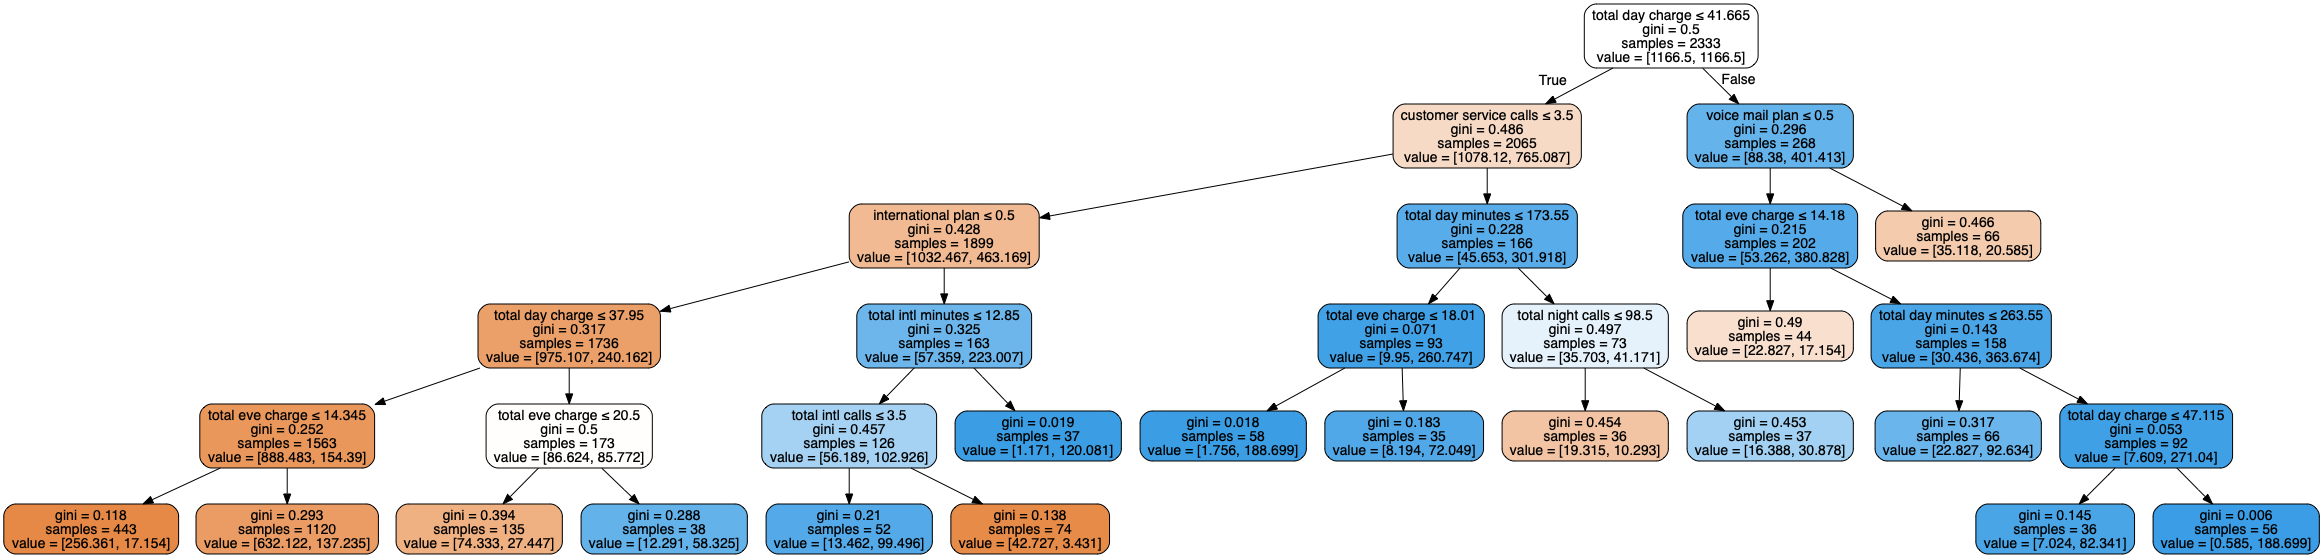

In [51]:
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model_tree_f, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [52]:
# calculating the 
fm_list = (tpr_test) -(m*(fpr_test))
list(zip(fm_list.tolist(), thresholds_test.tolist()))

[(0.0, 1.9969078259287891),
 (0.1039216806256411, 0.996907825928789),
 (0.24980140320932417, 0.9907804944185836),
 (0.33079721431701664, 0.9903457088095408),
 (0.4617174986452219, 0.9214054553860379),
 (0.5009343049016328, 0.8978825649496921),
 (0.5603357449743612, 0.8808235670634135),
 (0.6255777306638725, 0.8259428097803564),
 (0.7028588818004701, 0.8022990562240014),
 (0.7111833872764616, 0.6532760316130677),
 (0.7434071865398656, 0.4290635091496232),
 (0.7311107452503568, 0.3695531244205451),
 (0.7623611202442969, 0.3476364904936333),
 (0.7128955196084031, 0.26967052296867594),
 (0.338507809713795, 0.17837644321131577),
 (0.31240439154503263, 0.07432961623093275),
 (0.1657754010695187, 0.06271831828051735)]

The highest FM is 0.7623 which corresponds to a threshold of **0.35**. We will now use the latter as our ideal threshold

##  Plotting Confusion Matrix for selected threshold

In [53]:
# creating a new list with threshold 0.53 separating churn 1 and non-churn 0
probs_list_test = model_tree_f.predict_proba(X_test)[:,1]

final_res =[]
for x in probs_list_test:
    if x > 0.3476364904936333:
        final_res.append(1)
    else:
        final_res.append(0)
final_res
len(final_res)


1000

In [54]:
# plotting the confusion matrix for the .34 threshold
confusion_matrix(y_test, final_res)

array([[746, 111],
       [ 23, 120]])

In [55]:
# listing all the TN, FP, FN, TP
tn, fp, fn, tp = confusion_matrix(y_test, final_res).ravel()
tn, fp, fn, tp

(746, 111, 23, 120)

In [56]:
# evaluating performance on this specific confusion matrix
accuracy = print('Accuracy Score', accuracy_score(y_test, final_res))
roc_score = print('ROC_score ', roc_auc_score(y_test, y_hat_decision_tree))
precision = print('Precision ', precision_score(y_test, final_res))
recall= print('Recall or TPR ', recall_score(y_test, final_res))
f1__score = print('F1 score ', f1_score(y_test, final_res))

# power
# alpha
# precision

Accuracy Score 0.866
ROC_score  0.9093397850690733
Precision  0.5194805194805194
Recall or TPR  0.8391608391608392
F1 score  0.6417112299465241


In [57]:
# additional metrics including Type I error (alpha), statistical power (1-Beta)
alpha = 111/ (111 + 746)
print("alpha = ", alpha)

power = 120/(120 + 23)
print("power = ", power)

precision = 120/(120 +111)
print("precision = ", precision)

accuracy = (746 + 120 )/(111+ 23 + 746 + 120)
print("accuracy = ", accuracy)

alpha =  0.1295215869311552
power =  0.8391608391608392
precision =  0.5194805194805194
accuracy =  0.866


1) The value Alpha is the probability of our model saying that someone will churn when they actually wouldn't. That happens roughly once out of ten.

2) Power describes how capable our model is to identify someone who will churn and it will be 8 times out of 10.

3) Everytime our model predicts someone to be likely to churn, it will be correct half of the times. However we will systematically be saving more money by being safe rather than sorry. Being wrong here would just cost 60 dollars while not being able to recognise someone about to churn would incur in 5 times as much marketing spend. Luckily enough that happens only about two customers in ten (Miss Rate or 1 minus beta).

4) Also, overall the model will be able to identify correctly 90% of the times both customers who would and wold not churn.

## How much money could this model save you?

**Pre-Model Loss**

We know churn rate is overall 14%. Out of a thousand people in a pre-model scenario, that would incur in the cost of losing 144 customers without doing anything about it ad thus having to spend `$ 315 for each of their replacements.

Total Loss for Churning Customers > 144 x  315 = $ 45,360

**After-Model Loss**

Out of the same 1000 people sample we would still mistakenly think that 23 people would not churn when they will (total cost 315*23 = 7245). At the same time this model would make you mistakenly spend spend 60 *111 = 6660 on people we thought would churn but they won't. Lastly, it would correctly take preventive measures and spend the 60 marketing on 114 people who were actually about to churn and we will try to retain (60 *120).

Summing all the costs above > 7245 + 6000 + 7200 = $ 20,445


We would be saving on average (45,360 - 20,445)     ***$24,915***    per 1000 customers

## Understanding Features Importance

In [58]:
# listing all the decision tree coefficients
model_tree_f.feature_importances_

array([0.        , 0.24420359, 0.03817875, 0.        , 0.03996007,
       0.        , 0.24514141, 0.        , 0.        , 0.07479717,
       0.        , 0.00510119, 0.        , 0.02435269, 0.06393326,
       0.        , 0.26433187])

In [59]:
# creating a zip obejct with column names and decision tree coefficients
all_coef = dict(zip(df.columns, model_tree_f.feature_importances_ ))
all_coef

{'account length': 0.0,
 'international plan': 0.2442035905919021,
 'voice mail plan': 0.03817875128415697,
 'number vmail messages': 0.0,
 'total day minutes': 0.039960070755545044,
 'total day calls': 0.0,
 'total day charge': 0.2451414096392877,
 'total eve minutes': 0.0,
 'total eve calls': 0.0,
 'total eve charge': 0.07479717265040517,
 'total night minutes': 0.0,
 'total night calls': 0.005101187869800938,
 'total night charge': 0.0,
 'total intl minutes': 0.024352685207632112,
 'total intl calls': 0.06393325759355394,
 'total intl charge': 0.0,
 'customer service calls': 0.264331874407716}

In [60]:
# converting column names into a list and slicing the last column 'churn' out
x = list(df.columns)
x = x[:-1]
x

['account length',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

In [61]:
# created 
df_feature_importance = pd.DataFrame(model_tree_f.feature_importances_, columns=['feature importance'])
df_feature_importance

second_ = pd.DataFrame(x, columns=['feature'])
second_

,feature
0,account length
1,international plan
2,voice mail plan
3,number vmail messages
4,total day minutes
5,total day calls
6,total day charge
7,total eve minutes
8,total eve calls
9,total eve charge


In [62]:
second_ = pd.DataFrame(x, columns=['feature'])
second_

,feature
0,account length
1,international plan
2,voice mail plan
3,number vmail messages
4,total day minutes
5,total day calls
6,total day charge
7,total eve minutes
8,total eve calls
9,total eve charge


In [63]:
# creating a dataframe with feature names and importance 
mini_df_features = pd.concat([second_, df_feature_importance], axis = 1)
ordered = mini_df_features.sort_values(by ='feature importance', ascending = False).reset_index()

ordered.drop('index', axis =1)

,feature,feature importance
0,customer service calls,0.264332
1,total day charge,0.245141
2,international plan,0.244204
3,total eve charge,0.074797
4,total intl calls,0.063933
5,total day minutes,0.039960
6,voice mail plan,0.038179
7,total intl minutes,0.024353
8,total night calls,0.005101
9,total intl charge,0.000000


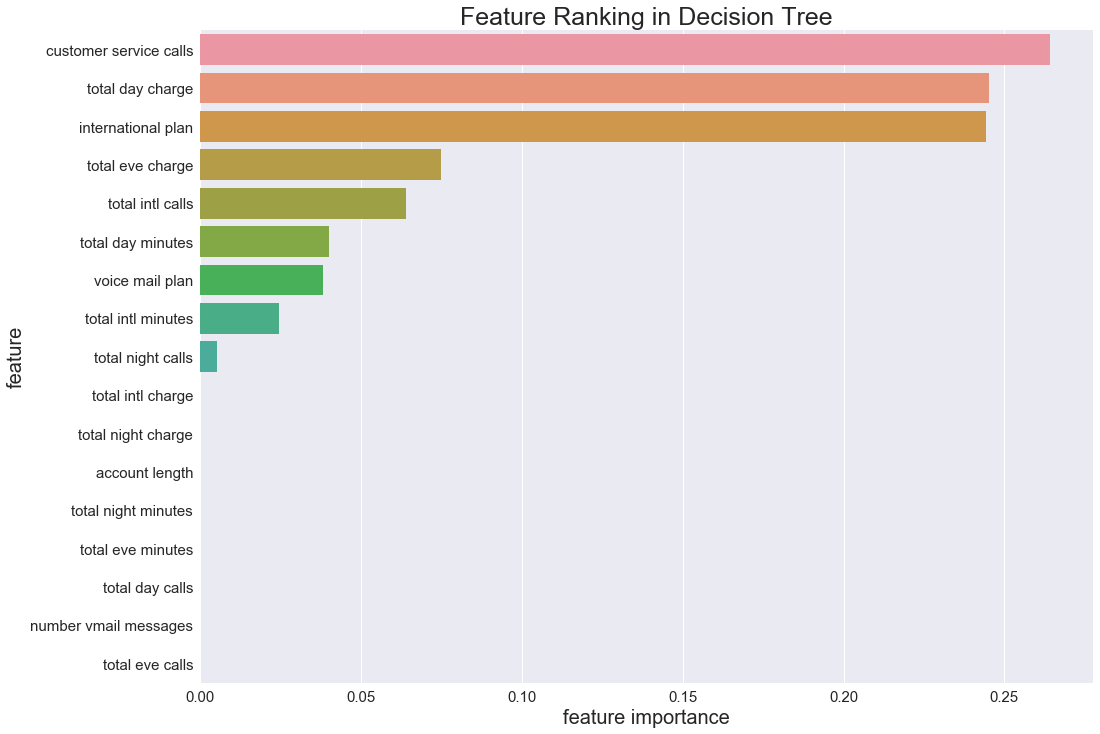

In [79]:
# plotting the decision tree importance features
plt.figure(figsize=(16,12))
sns.barplot(ordered['feature importance'],
            ordered['feature'], 
            orient = 'h',
            )

plt.title ('Feature Ranking in Decision Tree', fontsize = 25)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
x
plt.xlabel('feature importance',fontsize = 20)
plt.ylabel('feature',fontsize = 20)

plt.show()